In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

def setup_plot():
    gs = mpl.gridspec.GridSpec(5, 2)
    return gs

def plot(i, n, pi, in_circle, out_circle):
    ax = plt.subplot(gs[int(i / 2), i % 2])
    ax.plot(in_circle[:, 0], in_circle[:, 1], 'o', ms=2)    
    ax.plot(out_circle[:, 0], out_circle[:, 1], 'o', ms=2)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.text(0, -0.9, r"n = {:d}; $\pi\approx${:.4f}".format(n, pi), 
            verticalalignment='center', horizontalalignment='center', size=20)

# Monte Carlo

This is an example of the determination of $\pi$ using Monte-Carlo sampling. In this example, a series of points on a *x*-/*y*-plane are found randomly, within the range $-1$ and $+1$. The distance is then calcuated between the point and the origin $(0, 0)$, if the distance is less than 1, the point is colorued blue, it is 1 or greater it is coloured orange. 

The area of the square can be estimated as the total number of points, while the area of the circle can be estimated as the number of points coloured blue, this allows $pi$ to be found as follows, 

$$ A_{\text{square}} = 4r^2 $$

$$ A_{\text{circle}} = \pi r ^2, $$

by equating the values of $r$, 

$$ \pi = \frac{4A_{\text{circle}}}{A_{\text{square}}} $$

In [8]:
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

3000.0
624.0
4000.0
876.0
5000.0
1062.0
6500.0
1391.0
8500.0
1840.0
10000.0
2136.0
15000.0
3146.0
18000.0
3879.0
24000.0
5136.0
30000.0
6354.0


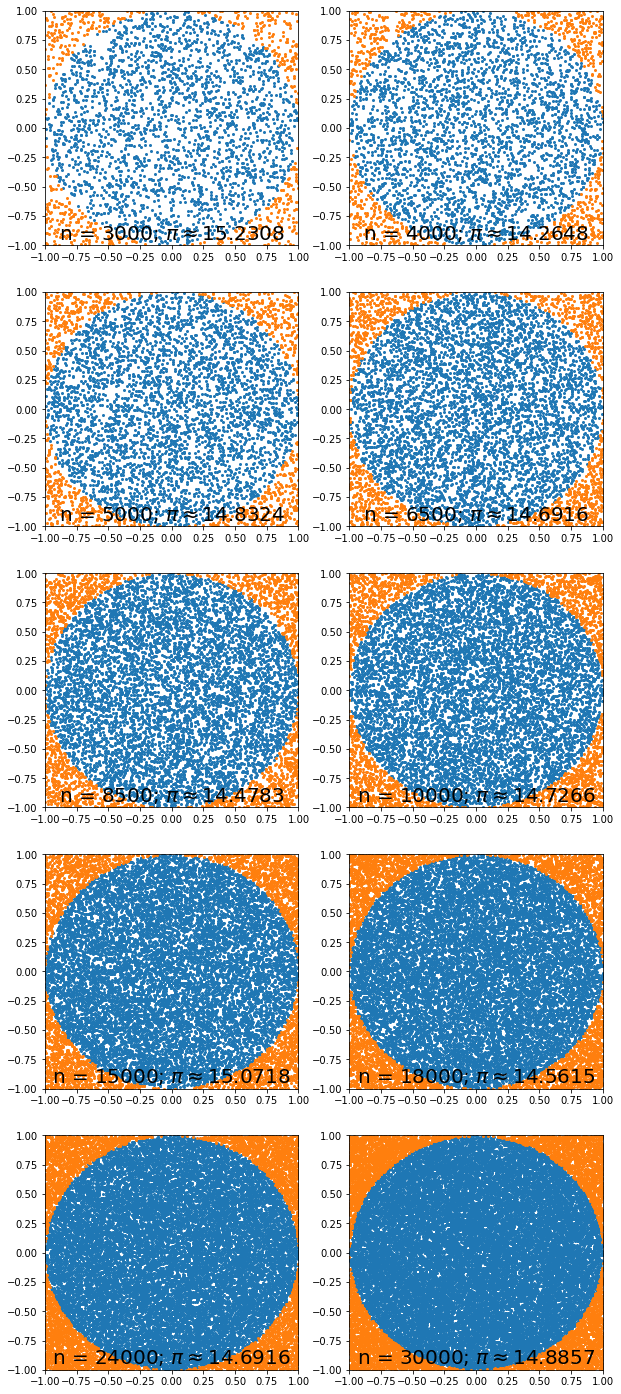

In [14]:
%matplotlib inline

n_values = np.array([3000, 4000, 5000, 6500, 8500, 
                     10000, 15000, 18000, 24000, 30000])
plt.figure(figsize=(10, 25))
gs = setup_plot()

for i, n in enumerate(n_values):
    a = np.random.rand(n, 2) * 2 - 1
    print(a.size/2)
    
    in_circle = a[np.where(distance(a, [0, 0]) < 1)]
    out_circle = a[np.where(distance(a, [0, 0]) >= 1)]
    print(out_circle.size/2)
    pi = in_circle.size/2 / (in_circle.sizeout_circle.size/2) * 4
    plot(i, n, pi, in_circle, out_circle)

plt.show()